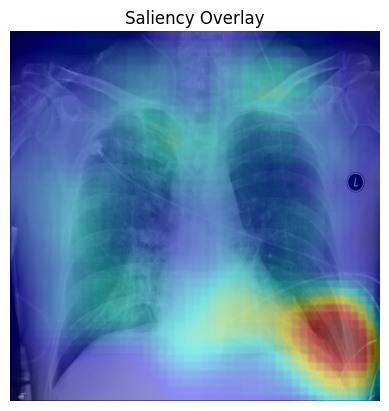

In [ ]:
import numpy as np
from PIL import Image
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import cv2

# Paths
saliency_path = "F:\CODE\DLS-X-mir\X-mir-clone\saliency\sub-S06689_ses-E11924_run-1_bp-chest_vp-pa_dx-corrected.png/b038a798-3637-4f41-9e6a-c84660b45560.png.npy"
image_path = "F:\CODE\DLS-X-mir\datasets/andyczhao\covidx-cxr2/versions\9/train/b038a798-3637-4f41-9e6a-c84660b45560.png"  # Replace this with actual path
output_path = 'C:/Users/admin/Desktop/overlay_result2.jpg'         # Optional: output

# Load saliency map
saliency_map = np.load(saliency_path)
if saliency_map.ndim == 3:
    saliency_map = saliency_map[0]  # take first channel if necessary

# Load and preprocess image
image = Image.open(image_path).convert('RGB')
image_np = np.array(image)

# Resize saliency map to image size
saliency_tensor = torch.tensor(saliency_map).unsqueeze(0).unsqueeze(0)
saliency_resized = F.resize(saliency_tensor, image.size[::-1]).squeeze().numpy()

# Normalize to [0, 255]
saliency_norm = (saliency_resized - saliency_resized.min()) / \
                (saliency_resized.max() - saliency_resized.min() + 1e-8)
saliency_uint8 = np.uint8(255 * saliency_norm)

# Create heatmap and overlay
heatmap = cv2.applyColorMap(saliency_uint8, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image_np, 0.6, heatmap, 0.4, 0)
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# Show result
plt.imshow(overlay_rgb)
plt.axis('off')
plt.title('Saliency Overlay')
plt.show()

# Save if needed
Image.fromarray(overlay_rgb).save(output_path)
